**Install Required Libraries**

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

**Create the Dataset**

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Generate synthetic data
np.random.seed(0)
data = {
    'Brand': np.random.choice(['BrandA', 'BrandB', 'BrandC', 'BrandD'], 1000),
    'RAM': np.random.randint(2, 12, 1000),  # RAM in GB
    'Storage': np.random.randint(16, 256, 1000),  # Storage in GB
    'Battery': np.random.randint(2000, 5000, 1000),  # Battery in mAh
    'Price': np.random.randint(100, 1000, 1000)  # Price in USD
}

In [4]:
df = pd.DataFrame(data)
df.to_csv('mobile_prices.csv', index=False)

**EDA and Data Preprocessing**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_csv('mobile_prices.csv')

In [7]:
# Display the first few rows of the dataframe
print(df.head())

    Brand  RAM  Storage  Battery  Price
0  BrandA    9      126     2437    802
1  BrandD   10      180     2984    214
2  BrandB    4       44     2778    399
3  BrandA    5       80     2121    731
4  BrandD    5      218     3323    138


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Brand    1000 non-null   object
 1   RAM      1000 non-null   int64 
 2   Storage  1000 non-null   int64 
 3   Battery  1000 non-null   int64 
 4   Price    1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


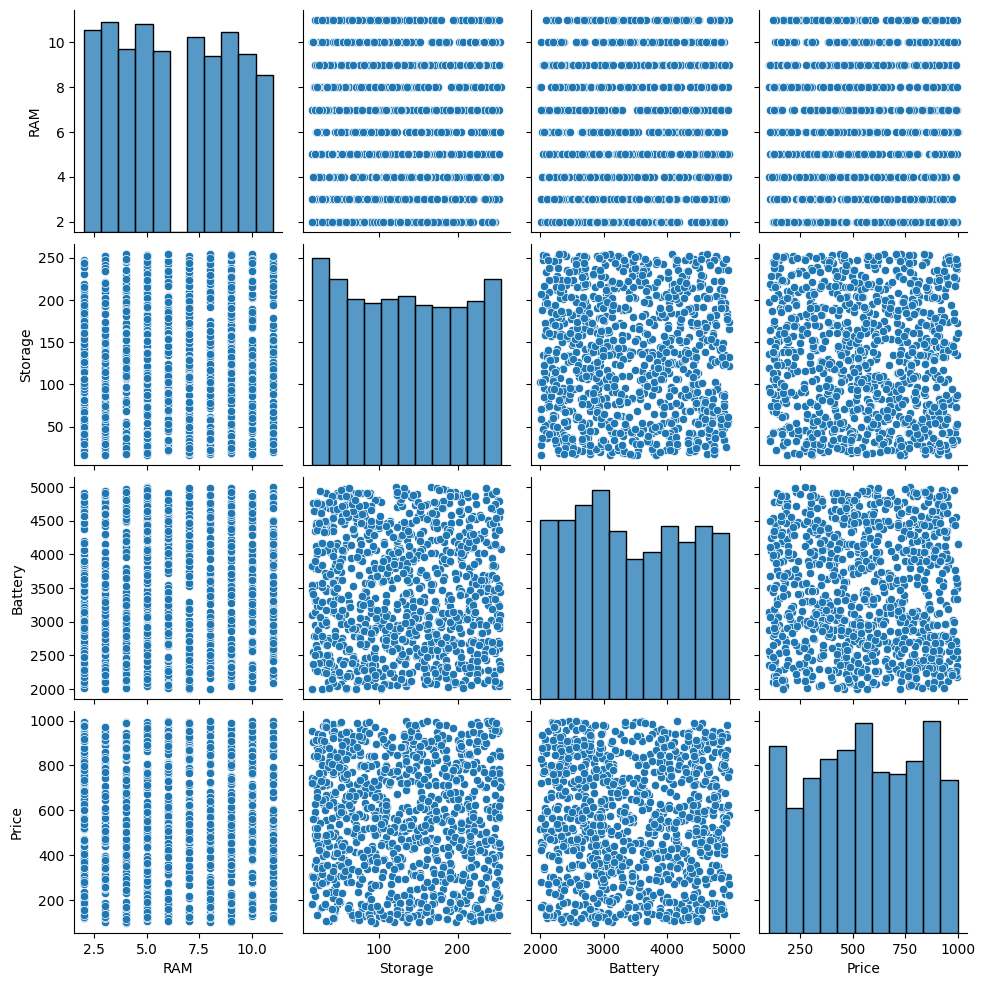

In [9]:
# EDA
sns.pairplot(df)
plt.show()

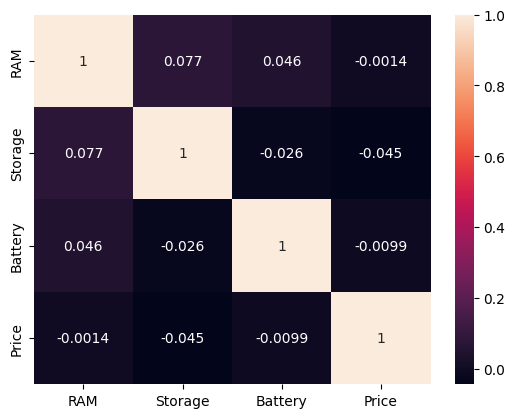

In [11]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['float', 'int'])  # Select numerical columns
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [12]:
# Data preprocessing
df = pd.get_dummies(df, drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training and Evaluating Models**

**Linear Regression**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
MAE: 228.76509020595455
MSE: 69466.83801848699
RMSE: 263.56562374195727
R2 Score: -0.0015054567683676634


**Random Forest Regressor**

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [19]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance:
MAE: 245.06945
MSE: 83276.19734750001
RMSE: 288.5761551956433
R2 Score: -0.20059539834309614


**Support Vector Regressor**

In [20]:
from sklearn.svm import SVR

In [21]:
# Train the model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [22]:
# Predict and evaluate
y_pred_svr = svr_model.predict(X_test)
print("Support Vector Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R2 Score:", r2_score(y_test, y_pred_svr))

Support Vector Regressor Performance:
MAE: 229.14849818718815
MSE: 69762.05031155766
RMSE: 264.1250656631393
R2 Score: -0.005761541122411451


**Stock Analysis Chart**

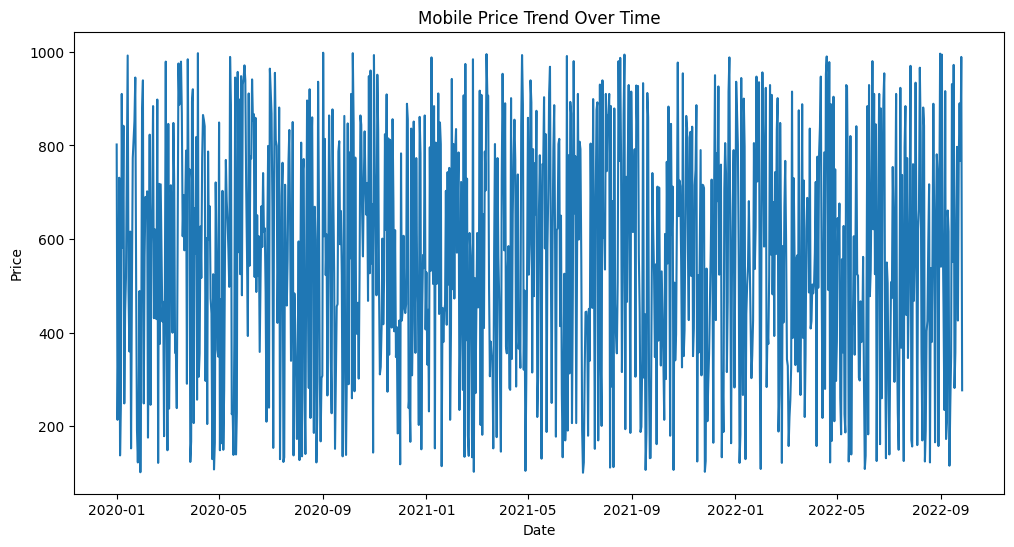

In [23]:
df['Date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='D')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Price')
plt.title('Mobile Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

**Predict New Data**

In [24]:
# Example new data
new_data = pd.DataFrame({
    'RAM': [8],
    'Storage': [128],
    'Battery': [4000],
    'Brand_BrandB': [0],
    'Brand_BrandC': [1],
    'Brand_BrandD': [0]
})

# Predict using the trained model (e.g., Random Forest)
new_pred = rf_model.predict(new_data)
print("Predicted Price:", new_pred)

Predicted Price: [482.9]
